In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-03 23:08:45,233 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-03 23:08:45,235 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-03 23:08:45,236 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-03 23:08:45,238 -INFO - dataset_builder:dataset_builder.py:200 - dataset package is loaded...
2021-06-03 23:08:45,858 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider',
  17: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider': 16,
  'n/a': 17})

# Generate dataset

2021-06-03 23:08:45,980 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: angular
2021-06-03 23:08:45,980 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-03 23:08:45,981 -INFO - dataset_builder:dataset_builder.py:121 - Creating driver
2021-06-03 23:08:47,047 -INFO - dataset_builder:dataset_builder.py:129 - Chrome web driver is created
2021-06-03 23:08:47,047 -INFO - <ipython-input-6-0f93ae86f6ac>:<ipython-input-6-0f93ae86f6ac>:5 - getting page
2021-06-03 23:09:05,081 -INFO - common:common.py:75 - Window maximized
2021-06-03 23:09:12,094 -INFO - dataset_builder:dataset_builder.py:132 - save scrinshot: dataset/images/angular.png
2021-06-03 23:09:14,423 -INFO - dataset_builder:dataset_builder.py:176 - Collect features using JS script
2021-06-03 23:09:19,276 -INFO - dataset_builder:dataset_builder.py:184 - Save html to dataset/html/angular.html
2021-06-03 23:09:19,339 -INFO - dataset_builder:dataset_builder.py:194 - Save parquet to

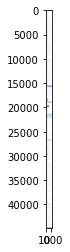

In [6]:
DATASET_NAME = 'angular'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        
        driver.find_element_by_id("user-icon").click()
        driver.find_element_by_id("name").send_keys(LOGIN)
        driver.find_element_by_id("password").send_keys(PASSWORD)
        driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
        driver.find_element_by_link_text("Elements packs").click()
        driver.find_element_by_link_text("Angular").click()
        sleep(WAIT_TIME_SECONDS)
        
#         driver.find_element_by_link_text("Service").click()
#         driver.find_element_by_link_text("Complex Table").click()
        maximize_window(driver=driver)
        sleep(WAIT_TIME_SECONDS)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-03 23:09:24,636 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

tag_name                    element_id                     parent_id  \
0        HTML  9000231738509544297656022193                          None   
1        HEAD  7656384564509544292215647992  9000231738509544297656022193   
2        META  3051157829509544296045558361  7656384564509544292215647992   
3       TITLE  4563240558509544296410466777  7656384564509544292215647992   
4        META  3924837953509544293941646388  7656384564509544292215647992   
...       ...                           ...                           ...   
6445       LI  9233155789509544399201803256  3712738857509544393139019838   
6446       LI  2827470673509544391988391359  3712738857509544393139019838   
6447        A  3839686032509544393369333776  2827470673509544391988391359   
6448   SCRIPT  2217819750509544390124835286  9751460430509544292702752514   
6449   SCRIPT  6135605158509544398601664612  9751460430509544292702752514   

                     upper_sibling                 lower_sibling  displayed  \
0                             None                          None       True   
1                             None  9751460430509544292702752514      False   
2                             None  4563240558509544296410466777      False   
3     3051157829509544296045558361  3924837953509544293941646388      False   
4     4563240558509544296410466777  3187997718509544291441179596      False   
...                            ...                           ...        ...   
6445  7154872084509544396747134084  2827470673509544391988391359       True   
6446  9233155789509544399201803256                          None       True   
6447                          None                          None       True   
6448  6328750937509544397213919610  6135605158509544398601664612      False   
6449  2217819750509544390124835286                          None      False   

      is_hidden            x         y        width   height  
0             0     0.000000      0.00  1183.000000  44785.0  
1             0     0.000000      0.00     0.000000      0.0  
2             0     0.000000      0.00     0.000000      0.0  
3             0     0.000000      0.00     0.000000      0.0  
4             0     0.000000      0.00     0.000000      0.0  
...         ...          ...       ...          ...      ...  
6445          0  1092.484375  44762.75     3.125000     14.0  
6446          0  1110.609375  44762.75    69.390625     14.0  
6447          0  1110.609375  44762.75    69.390625     14.0  
6448          1     0.000000      0.00     0.000000      0.0  
6449          1     0.000000      0.00     0.000000      0.0  

[6450 rows x 11 columns]

In [11]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-03 23:09:27,464 -INFO - common:common.py:489 - Num radio buttons found: 31
2021-06-03 23:09:27,471 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-03 23:09:27,476 -INFO - common:common.py:500 - Num checkboxes found: 0
2021-06-03 23:09:27,485 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 5
2021-06-03 23:09:27,490 -INFO - common:common.py:518 - Num textfields found: 9
2021-06-03 23:09:27,495 -INFO - common:common.py:523 - Num texfields for numbers found: 17
2021-06-03 23:09:27,501 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-03 23:09:27,507 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-03 23:09:27,509 -INFO - common:common.py:536 - Num buttons found: 173
2021-06-03 23:09:27,514 -INFO - common:common.py:541 - Num buttons1 found: 1
2021-06-03 23:09:27,521 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-03 23:09:27,524 -INFO - common:common.py:551 - Num links found: 238
(343, 8)


**Enrich predictions**

In [13]:
radio_df = df[(df.tag_name == 'MAT-RADIO-BUTTON') &
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]
radio_df

element_id           x           y       width  \
342   9880539724509544297619851286  230.000000    265.0000   76.609375   
352   2022956735509544297369932436  322.609375    265.0000   76.609375   
367   3487679526509544291176844589  235.000000    460.0000  930.000000   
377   2098713820509544293179893642  235.000000    495.0000  930.000000   
387   7092590512509544295868786223  235.000000    530.0000  930.000000   
397   8343157348509544293303897402  235.000000    565.0000  930.000000   
464   2862057022509544298584720158  307.234375   1054.5000   53.828125   
474   7032683869509544293949395193  381.062500   1054.5000   64.953125   
541   8297385072509544292137755719  310.203125   1657.5000   72.625000   
551   0901370722509544296401201074  402.828125   1657.5000   66.046875   
561   2863284653509544307840029199  488.875000   1657.5000   57.281250   
2101  3600447712509544312700748764  304.093750  13073.8125   54.359375   
2111  0787996375509544319467862350  382.453125  13073.8125   66.781250   
2604  7170769231509544332350030629  261.000000  17381.8750   54.406250   
2614  5343721457509544331190801106  331.406250  17381.8750   52.890625   
2624  5982074390509544339922303886  400.296875  17381.8750   56.156250   
4385  9172205449509544366716918775  310.203125  30931.1250   72.625000   
4395  8182865725509544368806417327  402.828125  30931.1250   66.046875   
4405  0707554228509544362133207508  488.875000  30931.1250   57.281250   
4418  8632039218509544364584387437  310.828125  30991.1250   98.218750   
4428  4633615488509544365183828524  429.046875  30991.1250  108.187500   
4531  1002591999509544367992834966  310.203125  32071.1250   72.625000   
4541  7937505229509544368580937484  402.828125  32071.1250   66.046875   
4551  2350534472509544360022200386  488.875000  32071.1250   57.281250   
4564  1255377249509544360498422988  310.828125  32131.1250   98.218750   
4574  6476676228509544364118181747  429.046875  32131.1250  108.187500   
4584  7888070674509544367520384223  557.234375  32131.1250   61.984375   
4594  3374869333509544360617204831  639.218750  32131.1250   62.343750   

      height  displayed  is_hidden  label  
342     25.0       True          0      5  
352     25.0       True          0      5  
367     25.0       True          0      5  
377     25.0       True          0      5  
387     25.0       True          0      5  
397     25.0       True          0      5  
464     25.0       True          0      5  
474     25.0       True          0      5  
541     25.0       True          0      5  
551     25.0       True          0      5  
561     25.0       True          0      5  
2101    25.0       True          0      5  
2111    25.0       True          0      5  
2604    25.0       True          0      5  
2614    25.0       True          0      5  
2624    25.0       True          0      5  
4385    25.0       True          0      5  
4395    25.0       True          0      5  
4405    25.0       True          0      5  
4418    25.0       True          0      5  
4428    25.0       True          0      5  
4531    25.0       True          0      5  
4541    25.0       True          0      5  
4551    25.0       True          0      5  
4564    25.0       True          0      5  
4574    25.0       True          0      5  
4584    25.0       True          0      5  
4594    25.0       True          0      5

In [14]:
encoder_dict['checkbox']

4

In [15]:
checkbox_df = df[(df.tag_name == 'MAT-CHECKBOX') &
              df.displayed & (df.is_hidden == 0) 
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

element_id           x             y       width  \
415   0956433513509544298021415012  230.000000    806.125000   83.390625   
435   5145910463509544297759063609  256.000000    992.500000   73.046875   
448   3486324677509544297201522383  349.046875    992.500000  104.187500   
485   7238379555509544299601483475  256.000000   1112.500000   73.500000   
502   6476521030509544299759092574  256.000000   1233.500000  108.109375   
572   9212527384509544308046755164  256.000000   1715.500000   73.046875   
586   4540588752509544305377049822  256.000000   1775.500000   73.500000   
891   7712263599509544307933065784  230.000000   4642.750000  101.703125   
1539  9327726850509544310592693179  254.000000   9364.250000   84.593750   
1553  4171392237509544317254741191  254.000000   9424.250000  127.359375   
1567  5757949462509544316410535443  254.000000   9484.250000   65.812500   
1580  4992212735509544312869179898  335.812500   9484.250000   70.687500   
1594  9584796628509544316565986717  254.000000   9544.250000   73.500000   
2085  1272432740509544310911281038  230.000000  13044.937500  144.312500   
2524  4039969161509544336744085412  246.000000  16850.000000  113.968750   
2692  1523363105509544338958003195  430.000000  18338.000000   53.796875   
3359  6916713545509544355496182292  270.000000  23715.500000   77.156250   
3383  4266185176509544359571515864  270.000000  23763.500000   84.750000   
3782  5568361484509544356657084003  355.843750  26029.375000  150.625000   
4636  9400999111509544366622451368  230.000000  32570.437500   75.765625   
4649  0572806346509544368613704438  317.765625  32570.437500   73.500000   
4662  3670301048509544366395114918  403.265625  32570.437500   92.250000   
4880  2541631223509544363506233397  346.281250  34805.375000  115.437500   
5965  2632505056509544375582021731  254.000000  42153.359375   16.000000   
5985  9743190292509544372180995922  254.000000  42204.875000   16.000000   
6004  3717825567509544376811395531  254.000000  42252.875000   16.000000   
6023  1078969132509544376525559890  254.000000  42300.875000   16.000000   
6042  0778649573509544373120061742  254.000000  42348.875000   16.000000   
6061  0216111513509544376793356425  254.000000  42396.875000   16.000000   

      height  displayed  is_hidden  label  
415     16.0       True          0      4  
435     29.0       True          0      4  
448     29.0       True          0      4  
485     29.0       True          0      4  
502     29.0       True          0      4  
572     29.0       True          0      4  
586     29.0       True          0      4  
891     16.0       True          0      4  
1539    29.0       True          0      4  
1553    29.0       True          0      4  
1567    29.0       True          0      4  
1580    29.0       True          0      4  
1594    29.0       True          0      4  
2085    16.0       True          0      4  
2524    16.0       True          0      4  
2692    16.0       True          0      4  
3359    29.0       True          0      4  
3383    29.0       True          0      4  
3782    16.0       True          0      4  
4636    16.0       True          0      4  
4649    16.0       True          0      4  
4662    16.0       True          0      4  
4880    16.0       True          0      4  
5965    14.0       True          0      4  
5985    16.0       True          0      4  
6004    16.0       True          0      4  
6023    16.0       True          0      4  
6042    16.0       True          0      4  
6061    16.0       True          0      4

In [16]:
slider_df = df[(df.tag_name == 'MAT-SLIDE-TOGGLE') & df.displayed & (df.is_hidden == 0) 
             ].copy()
slider_df['label'] = encoder_dict['slider']
slider_df = slider_df[predictions_df.columns]
slider_df

element_id      x         y       width  height  \
522  0441212873509544296174337043  230.0  1469.000  102.359375    24.0   
603  2053183103509544305388241848  256.0  1899.000  102.359375    24.0   
632  9233771988509544303802802095  230.0  2202.125  133.515625    24.0   

     displayed  is_hidden  label  
522       True          0     16  
603       True          0     16  
632       True          0     16

In [17]:
selector_df = df[df.tag_name.isin(['MAT-SELECT', 'SELECT']) & df.displayed & (df.is_hidden == 0)].copy()
selector_df['label'] = encoder_dict['selector']
selector_df = selector_df[predictions_df.columns]
selector_df

element_id           x           y  width  height  \
740   4724372582509544305522124788  240.500000   3441.5625  180.0    15.0   
759   2329200660509544302446506657  240.500000   3536.6875  180.0    29.0   
781   0781277619509544303745772381  240.500000   3747.8125  180.0    15.0   
807   4087195957509544302379832566  240.500000   3989.9375  180.0    15.0   
827   3745672394509544308145940759  240.500000   4101.0625  180.0    29.0   
850   6392168365509544303032276188  240.500000   4357.1875  180.0    15.0   
871   9416919581509544300905736804  240.500000   4452.3125  180.0    29.0   
909   3229763014509544301823564871  240.500000   4731.4375  180.0    15.0   
928   6766332189509544307003705667  240.500000   4826.5625  180.0    29.0   
951   4329895102509544300167132655  240.500000   5066.6875  180.0    15.0   
970   7442687339509544300114175129  240.500000   5161.8125  180.0    29.0   
993   5297370337509544306300637990  240.500000   5401.9375  180.0    15.0   
1012  1175542703509544309058410719  240.500000   5497.0625  180.0    29.0   
1035  3027679598509544307663768092  240.500000   5708.1875  180.0    15.0   
1057  0458787496509544305536334574  240.500000   5905.3125  180.0    15.0   
1079  3826706147509544302325205925  240.500000   6102.4375  180.0    15.0   
1101  7423237403509544305261427346  240.500000   6299.5625  180.0    15.0   
1125  5424328547509544307908106553  240.500000   6525.6875  180.0    15.0   
1146  7237702383509544307577337613  240.500000   6620.8125  180.0    29.0   
1217  6032876467509544301271625183  240.500000   7365.0000  180.0    15.0   
2051  1364344135509544316698762483  240.500000  12783.3750  180.0    15.0   
2149  2854240334509544310262099598  696.500000  13134.7500  199.0    15.0   
2269  8815188666509544328884363321  449.500000  13767.8125  180.0    15.0   
2353  2738360005509544322067477452  242.000000  14363.2500  180.0    18.0   
4810  2461084572509544361756476121  240.500000  34255.9375  180.0    15.0   
4950  6976813049509544366265870834  240.500000  35559.3125  180.0    15.0   
5023  3336702899509544368885771221  888.937500  36076.8750   46.0    13.0   
5788  8702237931509544377763271612  895.609375  41054.3750   46.0    13.0   
5863  4047089079509544374718150014  822.281250  41544.6250   46.0    13.0   

      displayed  is_hidden  label  
740        True          0     14  
759        True          0     14  
781        True          0     14  
807        True          0     14  
827        True          0     14  
850        True          0     14  
871        True          0     14  
909        True          0     14  
928        True          0     14  
951        True          0     14  
970        True          0     14  
993        True          0     14  
1012       True          0     14  
1035       True          0     14  
1057       True          0     14  
1079       True          0     14  
1101       True          0     14  
1125       True          0     14  
1146       True          0     14  
1217       True          0     14  
2051       True          0     14  
2149       True          0     14  
2269       True          0     14  
2353       True          0     14  
4810       True          0     14  
4950       True          0     14  
5023       True          0     14  
5788       True          0     14  
5863       True          0     14

In [18]:
text_df = df[(df.tag_name == 'MAT-FORM-FIELD') & df.displayed & (df.is_hidden == 0)].copy()
text_df['label'] = encoder_dict['textarea']
text_df = text_df[predictions_df.columns]
text_df

element_id           x          y  width  height  \
619   7814443244509544303925085697  230.000000   2132.000  500.0  70.125   
647   3903287304509544301903513377  230.000000   2353.125  500.0  70.125   
664   8550378446509544305541365305  230.000000   2550.250  500.0  70.125   
683   0632266860509544305951757533  230.000000   2747.375  500.0  70.125   
700   9422768136509544308796135280  230.000000   2944.500  201.0  70.125   
...                            ...         ...        ...    ...     ...   
5019  2735534354509544361828052202  879.937500  36054.750   64.0  60.250   
5389  1229483024509544375847196330  230.000000  38538.000  940.0  70.125   
5709  3871497898509544375385675546  230.000000  40755.125  940.0  70.125   
5784  1834037739509544378220178048  886.609375  41032.250   64.0  60.250   
5859  1478344638509544379139445644  813.281250  41522.500   64.0  60.250   

      displayed  is_hidden  label  
619        True          0      6  
647        True          0      6  
664        True          0      6  
683        True          0      6  
700        True          0      6  
...         ...        ...    ...  
5019       True          0      6  
5389       True          0      6  
5709       True          0      6  
5784       True          0      6  
5859       True          0      6  

[108 rows x 8 columns]

# Put everything together

In [19]:
print(predictions_df.shape, radio_df.shape, checkbox_df.shape, selector_df.shape)
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df, slider_df, selector_df, text_df])

(343, 8) (28, 8) (29, 8) (29, 8)


1200 44802


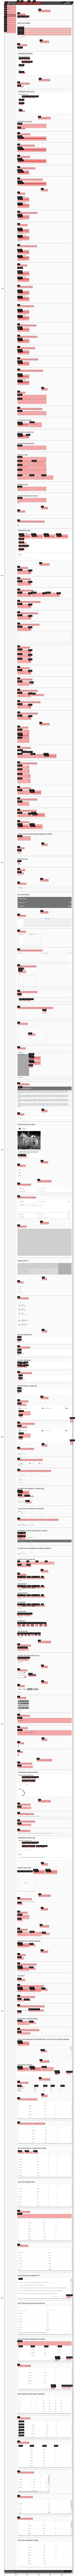

In [20]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Generate and Save Labels

In [21]:
labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
labels

[[3.0, 0.4, 0.053266, 0.399167, 0.000335],
 [3.0, 0.4, 0.057666, 0.399167, 0.000335],
 [3.0, 0.4, 0.062066, 0.399167, 0.000335],
 [3.0, 0.275417, 0.066466, 0.15, 0.000335],
 [3.0, 0.4, 0.070866, 0.399167, 0.000335],
 [2.0, 0.4, 0.053266, 0.399167, 0.000335],
 [2.0, 0.4, 0.057666, 0.399167, 0.000335],
 [2.0, 0.4, 0.062066, 0.399167, 0.000335],
 [2.0, 0.275417, 0.066466, 0.15, 0.000335],
 [2.0, 0.4, 0.070866, 0.399167, 0.000335],
 [2.0, 0.260417, 0.169081, 0.12, 0.000335],
 [2.0, 0.68418, 0.727176, 0.15, 0.000335],
 [0.0, 0.335, 0.168955, 0.029167, 0.000781],
 [0.0, 0.365, 0.221703, 0.029167, 0.000781],
 [0.0, 0.365, 0.226119, 0.029167, 0.000781],
 [0.0, 0.365, 0.230534, 0.029167, 0.000781],
 [0.0, 0.571667, 0.230534, 0.029167, 0.000781],
 [0.0, 0.778333, 0.230534, 0.029167, 0.000781],
 [0.0, 0.365, 0.234949, 0.029167, 0.000781],
 [0.0, 0.365, 0.239364, 0.029167, 0.000781],
 [0.0, 0.365, 0.24378, 0.029167, 0.000781],
 [0.0, 0.365, 0.252659, 0.029167, 0.000781],
 [0.0, 0.365, 0.254463, 0.

In [22]:
labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
labeled_df.label = labeled_df.label.astype(int)
display(labeled_df)
labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

label         x         y     width    height
0        3  0.400000  0.053266  0.399167  0.000335
1        3  0.400000  0.057666  0.399167  0.000335
2        3  0.400000  0.062066  0.399167  0.000335
3        3  0.275417  0.066466  0.150000  0.000335
4        3  0.400000  0.070866  0.399167  0.000335
..     ...       ...       ...       ...       ...
535      6  0.759948  0.805430  0.053333  0.001345
536      6  0.583333  0.860967  0.783333  0.001565
537      6  0.583333  0.910455  0.783333  0.001565
538      6  0.765508  0.916530  0.053333  0.001345
539      6  0.704401  0.927473  0.053333  0.001345

[540 rows x 5 columns]

# Preview Labels

In [23]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

label         x         y     width    height                   box
0      3  0.400000  0.053266  0.399167  0.000335  (240, 2378, 479, 15)
1      3  0.400000  0.057666  0.399167  0.000335  (240, 2576, 479, 15)
2      3  0.400000  0.062066  0.399167  0.000335  (240, 2773, 479, 15)
3      3  0.275417  0.066466  0.150000  0.000335  (240, 2970, 180, 15)
4      3  0.400000  0.070866  0.399167  0.000335  (240, 3167, 479, 15)

1200 44802


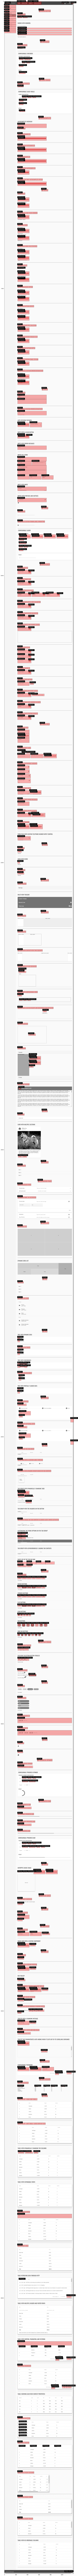

In [24]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

In [25]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [26]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-03 23:09:47,844 -INFO - labels:labels.py:37 - Assign labels from annotation file: dataset/annotations/angular.txt
2021-06-03 23:09:47,845 -INFO - labels:labels.py:39 - Getting image size
2021-06-03 23:09:47,847 -INFO - labels:labels.py:41 - Image size (w,h): (1200, 44802)
2021-06-03 23:09:47,848 -INFO - labels:labels.py:46 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider': 16, 'n/a': 17}
2021-06-03 23:09:47,849 -INFO - labels:labels.py:54 - getting "n/a" class code
2021-06-03 23:09:47,849 -INFO - labels:labels.py:61 - "n/a" class code: 17
2021-06-03 23:09:47,855 -INFO - labels:labels.py:71 - 540 annotation bas benn read


Assign labels:   0%|          | 0/540 [00:00<?, ?it/s]

2021-06-03 23:15:28,694 -INFO - labels:labels.py:122 - 540 labels have been assigned


In [27]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [28]:
df.label.value_counts()

17    5915
1      170
0      146
6      108
4       29
14      29
5       28
2       22
3        5
16       3
Name: label, dtype: int64

1200 44802


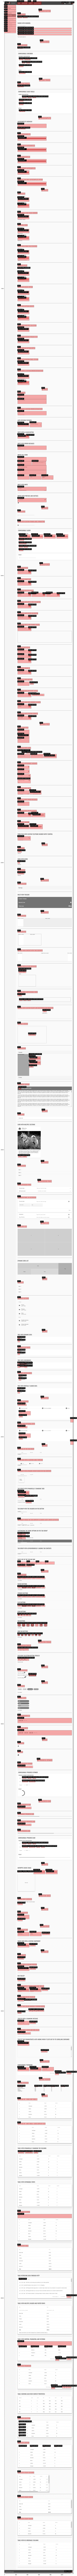

In [29]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name, # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
